In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Select the columns to normalize
columns_to_scale = df_market_data.columns[1:]  

# Step 4: Apply the StandardScaler to normalize the data
df_market_data[columns_to_scale] = scaler.fit_transform(df_market_data[columns_to_scale])

# Step 5: Display the normalized data
print(df_market_data)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                    0.493193   
ethereum                                  0.22392                    0.934445   
tether                                   -0.21173                   -0.706337   
ripple                                   -0.37819                   -0.810928   
bitcoin-cash                              2.90585                    2.000959   
binancecoin                               2.10423                    1.327295   
chainlink                                -0.23935                    2.572251   
cardano                                   0.00322                    1.508001   
litecoin                                 -0.06341                    0.334297   
bitcoin-cash-sv                           0.92530                   -0.190684   
crypto-com-chain            

In [8]:
# Scale market data, return, and variance values
df_market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", 
                     "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", 
                     "price_change_percentage_1y"]]
)

In [9]:
import pandas as pd

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", 
                     "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", 
                     "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  # Range from 1 to 11 (inclusive)
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
import os

# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

# Now import the KMeans module
from sklearn.cluster import KMeans

In [17]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  # Importing for plotting

# Set the environment variable to limit the number of threads to 1
os.environ["OMP_NUM_THREADS"] = "1"

# Define the range of clusters to test
k = range(1, 12)  # Range from 1 to 11 clusters

# Create an empty list to store the inertia values
inertia = []

# Loop through the range of clusters and calculate inertia
for i in k:
    try:
        model = KMeans(n_clusters=i, random_state=0)
        model.fit(df_market_data_scaled)
        inertia.append(model.inertia_)
    except Exception as e:
        print(f"Error for n_clusters={i}: {e}")
        inertia.append(None)  # Append None to keep list lengths consistent

# Filter out None values to ensure clean DataFrame creation
filtered_elbow_data = {'Number of Clusters (k)': [], 'Inertia': []}
for idx, value in enumerate(inertia):
    if value is not None:  # Only include valid inertia values
        filtered_elbow_data['Number of Clusters (k)'].append(list(k)[idx])
        filtered_elbow_data['Inertia'].append(value)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(filtered_elbow_data)

# Display the DataFrame
print(elbow_df)




C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

    Number of Clusters (k)     Inertia
0                        1  287.000000
1                        2  198.571818
2                        3  145.635748
3                        4   79.022435
4                        5   66.217780
5                        6   59.139070
6                        7   48.406314
7                        8   38.993588
8                        9   34.400595
9                       10   28.573603
10                      11   23.890044


C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming df_market_data is your original dataset
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data) 

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'Number of Clusters (k)': list(k), 'Inertia': inertia}

# Ensure both lists have the same length
if len(elbow_data['Number of Clusters (k)']) == len(elbow_data['Inertia']):
    # Create a DataFrame with the data to plot the Elbow curve
    elbow_df = pd.DataFrame(elbow_data)

    # Display the DataFrame
    print(elbow_df)


    Number of Clusters (k)     Inertia
0                        1  287.000000
1                        2  198.571818
2                        3  145.635748
3                        4   79.022435
4                        5   66.217780
5                        6   59.139070
6                        7   48.406314
7                        8   38.993588
8                        9   34.400595
9                       10   28.573603
10                      11   23.890044


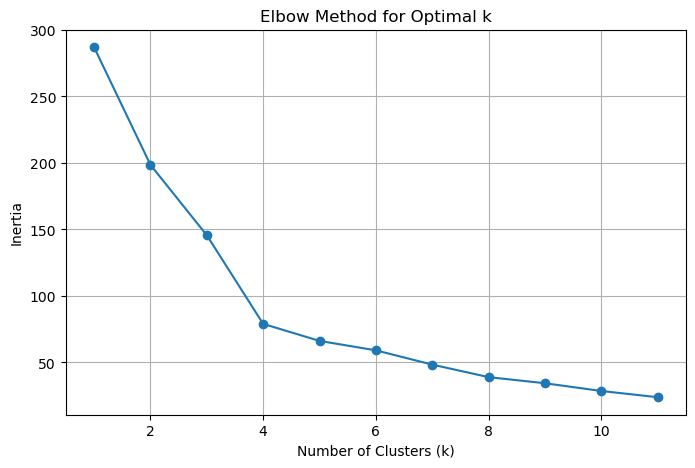

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['Number of Clusters (k)'], elbow_df['Inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [32]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)

In [34]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data)

C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(market_data_clusters)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0
 1 1 1 1]


C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [38]:
import pandas as pd

# Convert the NumPy array to a Pandas DataFrame
df_market_data_scaled = pd.DataFrame(df_market_data_scaled)

# Reset the index of the DataFrame
df_market_data_scaled.reset_index(drop=True, inplace=True)

# Convert market_data_clusters to a Pandas Series
market_data_clusters_series = pd.Series(market_data_clusters)

# Add a new column "MarketCluster" to the DataFrame using the Series
df_market_data_scaled["MarketCluster"] = market_data_clusters_series

# Display the updated DataFrame with clusters
print(df_market_data_scaled.head())

          0         1         2         3         4         5         6  \
0  0.508529  0.493193  0.772200  0.235460 -0.067495 -0.355953 -0.251637   
1  0.185446  0.934445  0.558692 -0.054341 -0.273483 -0.115759 -0.199352   
2  0.021774 -0.706337 -0.021680 -0.061030  0.008005 -0.550247 -0.282061   
3 -0.040764 -0.810928  0.249458 -0.050388 -0.373164 -0.458259 -0.295546   
4  1.193036  2.000959  1.760610  0.545842 -0.291203 -0.499848 -0.270317   

   MarketCluster  
0              1  
1              1  
2              1  
3              1  
4              0  


In [40]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled['MarketCluster'] = market_data_clusters

# Display sample data
print(df_market_data_scaled.head())

          0         1         2         3         4         5         6  \
0  0.508529  0.493193  0.772200  0.235460 -0.067495 -0.355953 -0.251637   
1  0.185446  0.934445  0.558692 -0.054341 -0.273483 -0.115759 -0.199352   
2  0.021774 -0.706337 -0.021680 -0.061030  0.008005 -0.550247 -0.282061   
3 -0.040764 -0.810928  0.249458 -0.050388 -0.373164 -0.458259 -0.295546   
4  1.193036  2.000959  1.760610  0.545842 -0.291203 -0.499848 -0.270317   

   MarketCluster  
0              1  
1              1  
2              1  
3              1  
4              0  


In [48]:
# Import necessary libraries
import pandas as pd
import hvplot.pandas

# Load data into a DataFrame
data = pd.read_csv('Resources/crypto_market_data.csv')

# Define the DataFrame df_market_data_scaled_df
df_market_data_scaled_df = data

# Preprocess and scale the data if needed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['price_change_percentage_24h', 'price_change_percentage_7d']])
data[['price_change_percentage_24h', 'price_change_percentage_7d']] = data_scaled



# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_df['market_data_cluster'] = market_data_clusters



# Display Data
df_market_data_scaled_df.head()


# Create the scatter plot
clusters_plot = df_market_data_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="market_data_cluster",
    hover_cols=["coin_id"],
    marker=["hex", "square", "cross", "inverted_triangle"],
    title="Cryptocurrencies Clusters",
)

# Display the scatter plot
clusters_plot


:NdOverlay   [market_data_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [66]:
# Reload the CSV file to define the variable
crypto_data = pd.read_csv('Resources/crypto_market_data.csv')

# Standardize the data before applying PCA
crypto_data_scaled = scaler.fit_transform(crypto_data[numeric_columns])

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(crypto_data_scaled)

# Create a DataFrame to display the PCA components
pca_df = pd.DataFrame(pca_fit, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'])

# Display the PCA components 
print("PCA Components:")
print(pca_df)



PCA Components:
    PCA_Component_1  PCA_Component_2  PCA_Component_3
0         -0.600667         0.842760         0.461595
1         -0.458261         0.458466         0.952877
2         -0.433070        -0.168126        -0.641752
3         -0.471835        -0.222660        -0.479053
4         -1.157800         2.041209         1.859715
5         -0.516534         1.388377         0.804071
6         -0.450711         0.517699         2.846143
7         -0.345600         0.729439         1.478013
8         -0.649468         0.432165         0.600303
9         -0.759014        -0.201200        -0.217653
10        -0.248198        -1.376252        -1.462026
11        -0.438408        -0.175337        -0.663388
12        -0.693425        -0.473815        -0.527597
13         0.060499         2.909404         1.498571
14        -0.393352        -0.108192        -0.012756
15        -0.796176        -0.494409         1.082812
16         0.064075        -1.269825        -1.098829
17        -0

In [68]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
pca_df.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [70]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [76]:
# Create a new DataFrame with the PCA data.
pca_data_df = pd.DataFrame(pca_fit, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'])

# Copy the crypto names from the original data
crypto_names = crypto_data['coin_id']

# Add the cryptocurrency names to the new PCA DataFrame
pca_data_df_with_names = pca_data_df.copy()
pca_data_df_with_names['coin_id'] = crypto_names

# Set the coinid column as index
pca_data_df_with_names.set_index('coin_id', inplace=True)

# Display sample data
pca_data_df.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [80]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [82]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Loop through the range of k-values to compute the inertia for each k
for k in k_values:
    # Create a KMeans model using the loop counter for the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans.fit(pca_data_df_with_names)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

inertia_values


C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[256.87408556789256,
 168.81189630685225,
 115.91807663320066,
 49.665496651797355,
 41.35731380312856,
 30.796641787041594,
 25.91545691045613,
 21.89093627463323,
 17.720698854473667,
 13.838698708864568,
 7.98435481189622]

In [86]:
import pandas as pd

# Create a dictionary with the k-values and corresponding inertia values
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame to the user
elbow_df.head()



,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


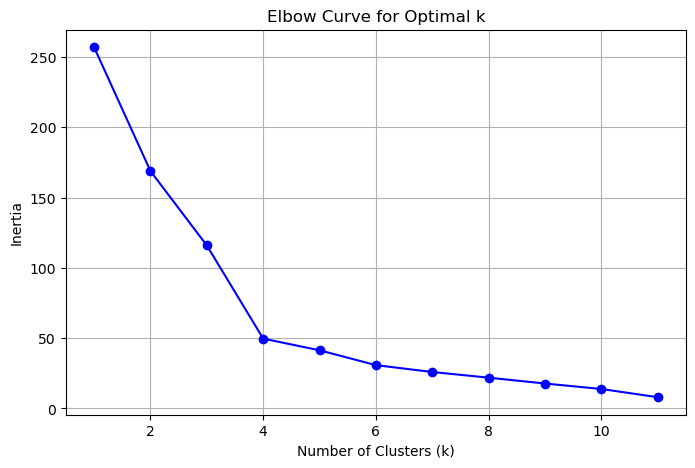

In [88]:
import matplotlib.pyplot as plt

# Plot a line chart for the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [92]:
# Best value for k is 3 
best_k = 3

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)





In [94]:
# Fit the model to the PCA data
kmeans_model.fit(pca_data_df_with_names)

# Display a message confirming the initialization and fitting
"Initialized K-Means model with k = 3 and fitted to the PCA data."

C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


'Initialized K-Means model with k = 3 and fitted to the PCA data.'

In [96]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(pca_data_df_with_names)
# Print the resulting array of cluster values.
cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [98]:
# Create a copy of the DataFrame with the PCA data
pca_data_with_clusters = pca_data_df_with_names.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_with_clusters['Cluster'] = cluster_predictions

# Display sample data
pca_data_with_clusters.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [100]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

scatter_plot = pca_data_with_clusters.hvplot.scatter(
    x='PCA_Component_1', 
    y='PCA_Component_2', 
    c='Cluster', 
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters Based on PCA Components'
)

# Display the scatter plot
scatter_plot


:Scatter   [PCA_Component_1]   (PCA_Component_2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

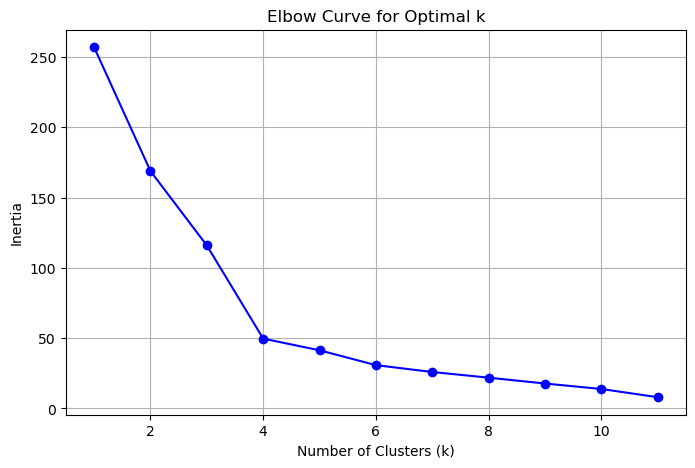

In [102]:
# Composite plot to contrast the Elbow curves

import matplotlib.pyplot as plt

# Plot the Elbow curve to find the optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


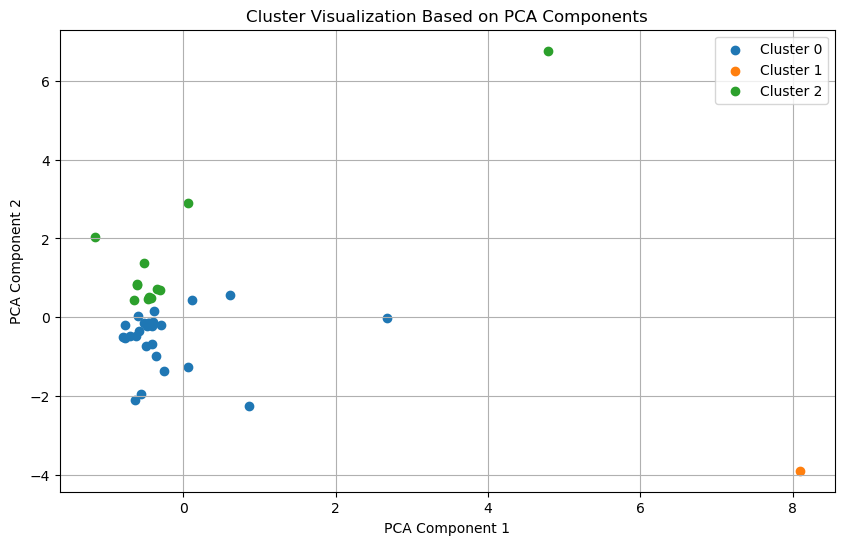

In [104]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for cluster in sorted(pca_data_with_clusters['Cluster'].unique()):
    cluster_data = pca_data_with_clusters[pca_data_with_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA_Component_1'], cluster_data['PCA_Component_2'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization Based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** more efficient, interpretable, and stable clustering